In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "/content/551_Mixed1.csv",
    index_col='Time Stamp',
    parse_dates=['Time Stamp'],
).drop(['Temperature','Capacity','Step', 'Status', 'Prog Time','Step Time','Cycle','Cycle Level','Procedure','Current','Cnt','WhAccu'], axis=1)

df['Time'] = np.arange(len(df.index))

df.head()

Voltage  Time
Time Stamp                        
2018-10-29 14:41:07  4.18464     0
2018-10-29 14:41:07  4.18396     1
2018-10-29 14:41:07  4.18363     2
2018-10-29 14:41:07  4.18363     3
2018-10-29 14:41:08  4.18346     4

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Voltage', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Voltage', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Voltage discharge');

In [19]:
df['Lag_1'] = df['Voltage'].shift(1)
df = df.reindex(columns=['Voltage', 'Lag_1'])

df.head()

Voltage    Lag_1
Time Stamp                           
2018-10-29 14:41:07  4.18464      NaN
2018-10-29 14:41:07  4.18396  4.18464
2018-10-29 14:41:07  4.18363  4.18396
2018-10-29 14:41:07  4.18363  4.18363
2018-10-29 14:41:08  4.18346  4.18363

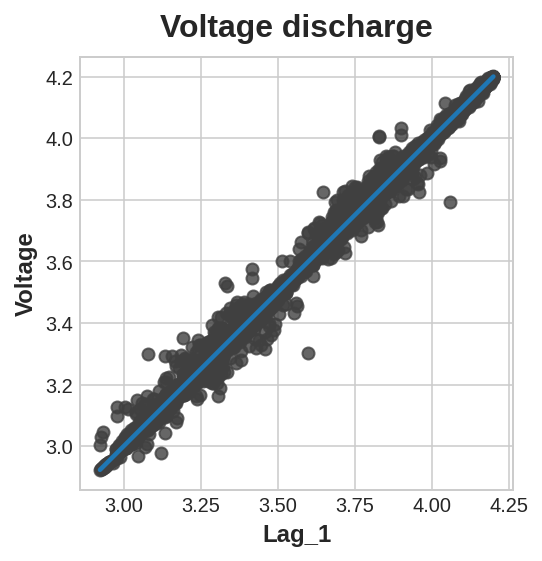

In [20]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Voltage', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Voltage discharge');

In [30]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
#data_dir = Path("../input/ts-course-data")
#tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
#tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
#tunnel = tunnel.to_period()

#tunnel.head()

In [21]:
from sklearn.linear_model import LinearRegression

In [29]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Voltage']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
#y_pred.size

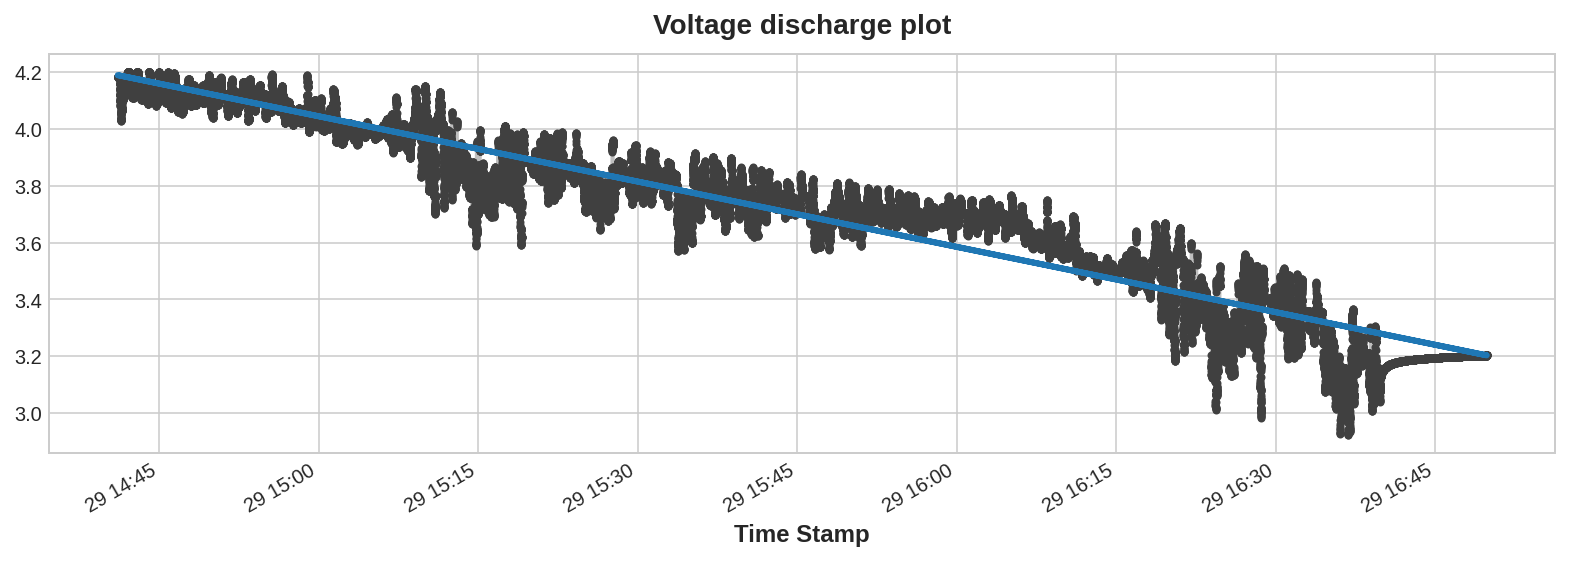

In [32]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Voltage discharge plot');

In [33]:
df['Lag_1'] = df['Voltage'].shift(1)
df.head()

Voltage  Time    Lag_1
Time Stamp                                 
2018-10-29 14:41:07  4.18464     0      NaN
2018-10-29 14:41:07  4.18396     1  4.18464
2018-10-29 14:41:07  4.18363     2  4.18396
2018-10-29 14:41:07  4.18363     3  4.18363
2018-10-29 14:41:08  4.18346     4  4.18363

In [34]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Voltage']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

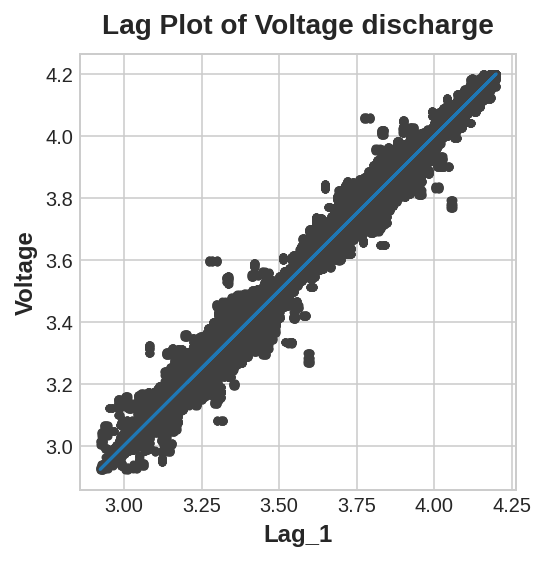

In [35]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Voltage')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Voltage discharge');

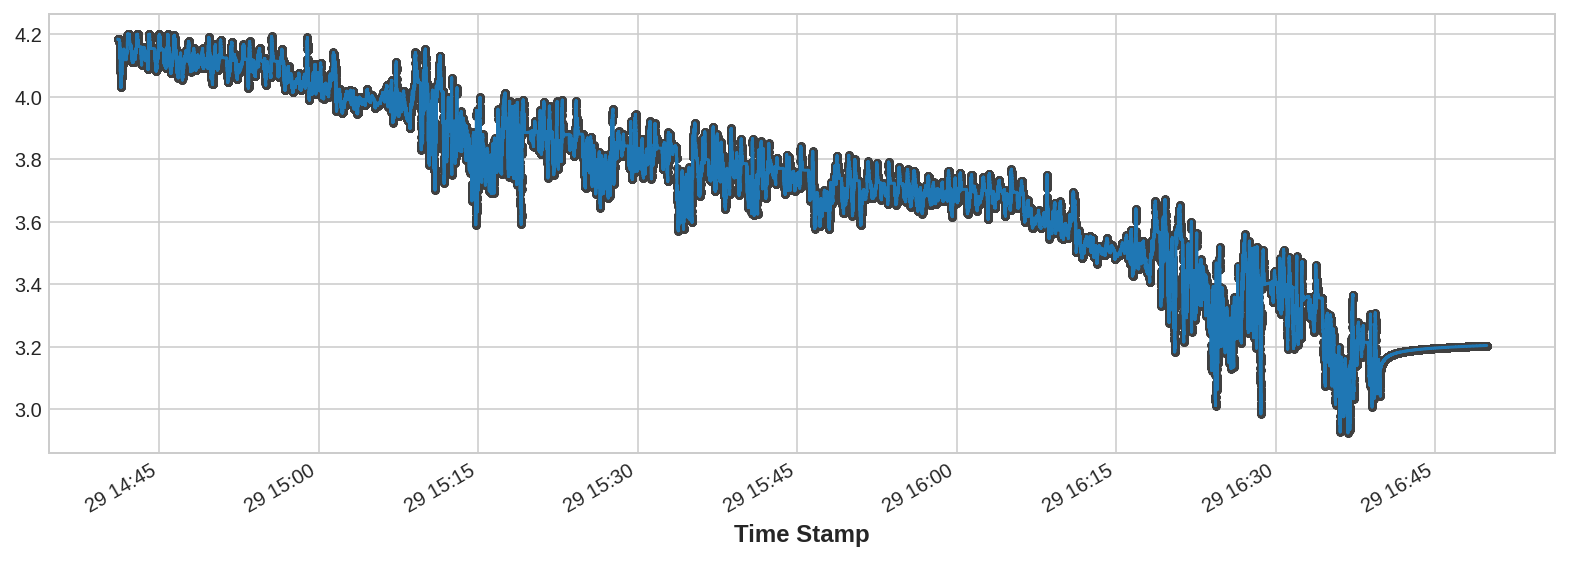

In [36]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [50]:
df

Voltage   Time
Time Stamp                         
2018-10-29 14:41:07  4.18464      0
2018-10-29 14:41:07  4.18396      1
2018-10-29 14:41:07  4.18363      2
2018-10-29 14:41:07  4.18363      3
2018-10-29 14:41:08  4.18346      4
...                      ...    ...
2018-10-29 16:49:49  3.20273  77222
2018-10-29 16:49:49  3.20273  77223
2018-10-29 16:49:49  3.20273  77224
2018-10-29 16:49:50  3.20273  77225
2018-10-29 16:49:50  3.20273  77226

[77227 rows x 2 columns]

In [51]:
# Load Tunnel Traffic dataset
#data_dir = Path("/content/551_Mixed1.csv")
#tun = pd.read_csv(data_dir, parse_dates=["Time Stamp"])
tun = df.set_index("Time Stamp").to_period()

KeyError: ignored

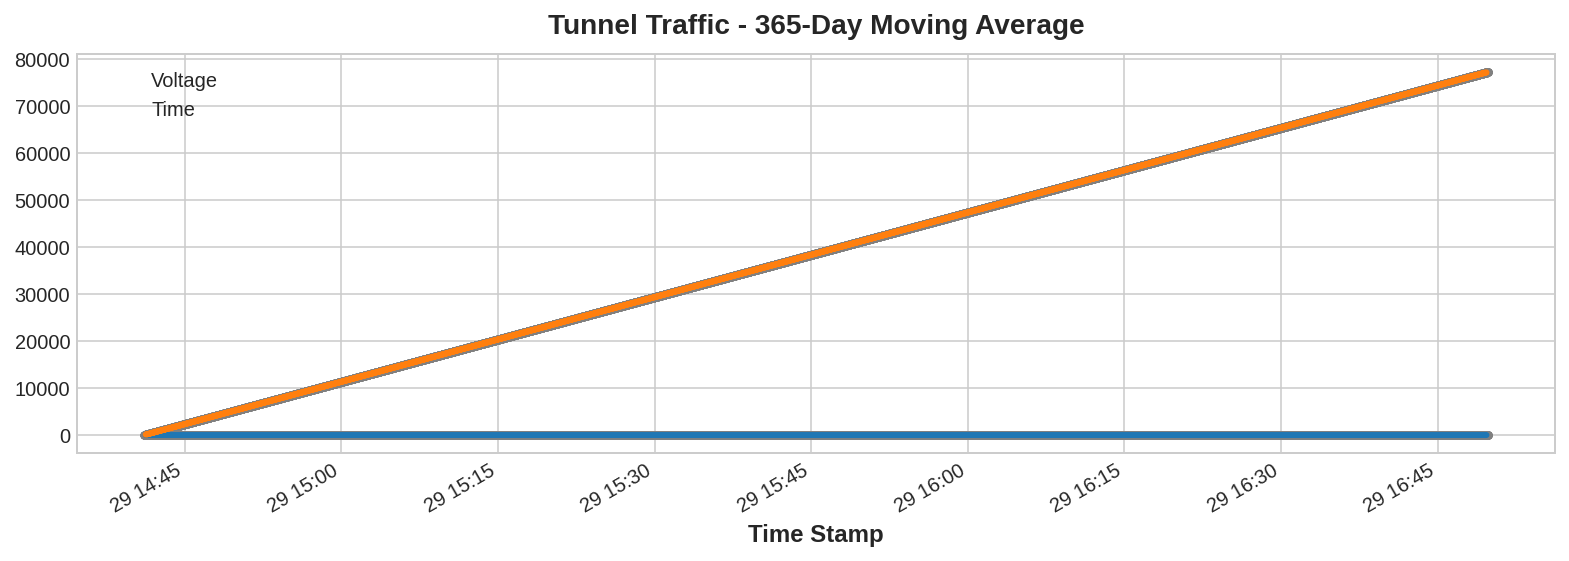

In [54]:
moving_average = df.rolling(
    window=200,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);